In [18]:
import pandas as pd
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

pd.options.display.max_rows = 20
plt.rcParams.update({"font.size":20})

In [19]:
BTR = pd.read_csv("SD_analysis_bbm-bnet-inputs-true.csv")
BTR.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
BTR = BTR.sort_values(by=["model_name"])
BTR = BTR.dropna(subset=["sdsize","sddepth"])

print("attractors equals minimal trapspaces =", BTR["att"].equals(BTR["mintrap"])) 

BTR_SCC = pd.read_csv("SCC_analysis_bbm-bnet-inputs-true.csv")
BTR_SCC.columns = ["model_name", "n", "source_SCC", "SCC", "est_size", "est_depth", "est_min"]

BTR = BTR.merge(BTR_SCC)
BTR.attrs["name"] = "bbm-inputs-true"

BTR

attractors equals minimal trapspaces = True


,model_name,n,sdsize,sddepth,att,maa,mintrap,source_SCC,SCC,est_size,est_depth,est_min
0,003.bnet,20,1,0,1,0,1,0,0,1,0,1
1,005.bnet,28,7,4,1,0,1,1,1,7,4,1
2,006.bnet,68,1,0,1,0,1,0,0,1,0,1
3,007.bnet,5,3,1,2,0,2,1,1,3,1,2
4,008.bnet,28,5,2,3,0,3,1,4,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
200,208.bnet,15,14,4,5,0,5,1,4,14,4,5
201,209.bnet,87,2,1,1,0,1,1,1,2,1,1
202,210.bnet,144,2,1,1,0,1,1,5,2,1,1
203,211.bnet,183,3,2,1,0,1,1,8,3,2,1


In [20]:
RAN = pd.read_csv("SD_analysis_random_nk.csv")
RAN.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
RAN = RAN.sort_values(by=["model_name"])
RAN = RAN.dropna(subset=["sdsize","sddepth"])

print("attractors equals minimal trapspaces =", RAN["att"].equals(RAN["mintrap"])) 

RAN_SCC = pd.read_csv("SCC_analysis_random_nk.csv")
RAN_SCC.columns = ["model_name", "n", "source_SCC", "SCC", "est_size", "est_depth", "est_min"]

RAN = RAN.merge(RAN_SCC)
RAN.attrs["name"] = "N-K random"

RAN

attractors equals minimal trapspaces = True


,model_name,n,sdsize,sddepth,att,maa,mintrap,source_SCC,SCC,est_size,est_depth,est_min
0,n10_1.bnet,10,2,1,1,0,1,1,5,1,0,1
1,n10_10.bnet,10,2,1,1,0,1,1,2,2,1,1
2,n10_11.bnet,10,2,1,1,0,1,1,7,1,0,1
3,n10_12.bnet,10,2,1,1,0,1,1,3,2,1,1
4,n10_13.bnet,10,19,4,5,0,5,1,4,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
584,n80_95.bnet,80,3,1,2,0,2,1,14,3,1,2
585,n80_96.bnet,80,2,1,1,0,1,1,29,1,0,1
586,n80_97.bnet,80,2,1,1,0,1,1,17,2,1,1
587,n80_98.bnet,80,2,1,1,0,1,1,17,2,1,1


In [21]:
NCF = pd.read_csv("SD_analysis_random_ncf.csv")
NCF.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
NCF = NCF.sort_values(by=["model_name"])
NCF = NCF.dropna(subset=["sdsize","sddepth"])

print("attractors equals minimal trapspaces =", NCF["att"].equals(NCF["mintrap"])) 

NCF_SCC = pd.read_csv("SCC_analysis_random_ncf.csv")
NCF_SCC.columns = ["model_name", "n", "source_SCC", "SCC", "est_size", "est_depth", "est_min"]

NCF = NCF.merge(NCF_SCC)
NCF.attrs["name"] = "NCF random"

NCF

attractors equals minimal trapspaces = True


,model_name,n,sdsize,sddepth,att,maa,mintrap,source_SCC,SCC,est_size,est_depth,est_min
0,n10_1.bnet,10,1,0,1,0,1,0,0,1,0,1
1,n10_10.bnet,10,2,1,1,0,1,1,1,2,1,1
2,n10_11.bnet,10,3,2,1,0,1,1,1,3,2,1
3,n10_12.bnet,10,3,1,2,0,2,2,2,3,1,2
4,n10_13.bnet,10,3,1,2,0,2,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
591,n80_95.bnet,80,1,0,1,0,1,0,0,1,0,1
592,n80_96.bnet,80,3,1,2,0,2,2,32,3,1,2
593,n80_97.bnet,80,15,3,4,0,4,2,15,15,3,4
594,n80_98.bnet,80,10,3,3,0,3,1,26,3,1,2


In [22]:
IND = pd.read_csv("ref_indep_sources.csv")
IND.attrs["name"] = "indep_sources"
IND.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap", "source_SCC", "SCC"]
IND["est_size"] = IND["sdsize"]
IND["est_depth"] = IND["sddepth"]
IND["est_min"] = IND["mintrap"]

IND

,model_name,n,sdsize,sddepth,att,maa,mintrap,source_SCC,SCC,est_size,est_depth,est_min
0,indep_sources_n1,1,3,1,2,0,2,1,1,3,1,2
1,indep_sources_n2,2,9,2,4,0,4,2,2,9,2,4
2,indep_sources_n3,3,27,3,8,0,8,3,3,27,3,8
3,indep_sources_n4,4,81,4,16,0,16,4,4,81,4,16
4,indep_sources_n5,5,243,5,32,0,32,5,5,243,5,32
5,indep_sources_n6,6,729,6,64,0,64,6,6,729,6,64
6,indep_sources_n7,7,2187,7,128,0,128,7,7,2187,7,128
7,indep_sources_n8,8,6561,8,256,0,256,8,8,6561,8,256
8,indep_sources_n9,9,19683,9,512,0,512,9,9,19683,9,512
9,indep_sources_n10,10,59049,10,1024,0,1024,10,10,59049,10,1024


In [23]:
DEP = pd.read_csv("ref_dep_cycles.csv")
DEP.attrs["name"] = "dep_cycles"
DEP.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]

DEP

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,dep_cycles_n1,1,3,1,2,0,2
1,dep_cycles_n2,2,6,2,3,0,3
2,dep_cycles_n3,3,10,3,4,0,4
3,dep_cycles_n4,4,15,4,5,0,5
4,dep_cycles_n5,5,21,5,6,0,6
...,...,...,...,...,...,...,...
315,dep_cycles_n316,316,50403,316,317,0,317
316,dep_cycles_n317,317,50721,317,318,0,318
317,dep_cycles_n318,318,51040,318,319,0,319
318,dep_cycles_n319,319,51360,319,320,0,320


In [24]:
class PlotVar:
    _label_dict = {
        "n": r"network size",
        "sdsize": r"SD size",
        "sddepth": r"SD depth",
        "att": r"number of attractors",
        "maa": r"number of motif avoidant attractors",
        "mintrap": r"number of minimal trapspaces",
        "source_SCC": r"number of source SCCs",
        "SCC": r"number of SCCs",
        "est_size": r"estimated SD size",
        "est_depth": r"estimated SD depth",
        "est_min": r"estimated number of minimal trapspaces",
    }

    def __init__(self, data:pd.DataFrame, name: str, minval: float, maxval: float, log:bool=False, trend:bool=False, ref=[]):
        self.data = data
        self.name = name
        self.minval = minval
        self.maxval = maxval
        self.label = self._label_dict[name]
        self.log = log
        self.trend = trend
        self.ref = ref

In [25]:
def monoExp(x, t):
    return np.exp(t * x)

def line(x, t):
    return t * x

def comparison_plots(vars, hlines=None, vlines=None):
    icount = len(vars)
    jcount = len(vars[0])

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(
        figs, (icount, jcount)
    )  # always treat as 2d array, even when only 1 col or row

    for i, j in it.product(range(icount), range(jcount)):
        px, py = vars[i][j]
        data = px.data        
        vx, vy = px.name, py.name
        xmin, xmax = px.minval, px.maxval  # lims[i][j][0]
        ymin, ymax = py.minval, py.maxval  # lims[i][j][1]
        xlog, ylog = px.log, py.log
        ytrend = py.trend
        yref = py.ref
    
        axd = figs[i, j].subplots(1,1)
        axd.set_zorder(10)
        axd.set_title(data.attrs["name"] + " " + py.label + " vs " + px.label)

        if hlines:
            axd.hlines(hlines, xmin, xmax, color="k", linestyle="-.")
        if vlines:
            axd.vlines(vlines, ymin, ymax, color="k", linestyle="-.")
        if xlog:
            axd.set_xscale("log")
        if ylog:
            axd.set_yscale("log")
        if ytrend:
            xs = data[vx].sort_values()
            ys = data[vy].sort_values()

            # fit to log
            p0 = (0.7) # start with values near those we expect
            params, cv = scipy.optimize.curve_fit(line, xs, np.log(ys), p0)
            t = params[0]
            # determine quality of the fit
            squaredDiffs = np.square(np.log(ys) - line(xs, t))
            squaredDiffsFromMean = np.square(np.log(ys) - np.mean(np.log(ys)))
            rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
            print(f"log fit: R² = {rSquared}")
            # plot the results
            xs1 = np.arange(xmin,xmax, 0.1)
            axd.plot(xs1, monoExp(xs1, t), "--", label="fitted_scipy")
            # inspect the parameters
            print(f"log fit: Y = e^({t} * x)")

            axd.annotate(
                f"y = ${round(np.exp(t),2)}^d$\nR² = {round(rSquared,3)}",
                xy=(0.8, 0.7),
                xycoords = "axes fraction",
                ha="center",
                va="center",
                c="tab:blue"
            )

        axd.scatter(data[vx], data[vy],
            s=100,
            alpha=0.3,
            zorder=10,
            clip_on=False,
        )
        
        if yref:
            for ref in yref:
                axd.plot(ref[vx], ref[vy],"-",c="k")

                if ref.attrs["name"] == "indep_sources" and vx == "sddepth" and vy == "sdsize":
                    axd.annotate(
                        f"y = $3^x$",
                        xy=(0.2, 0.8),
                        xycoords = "axes fraction",
                        ha="center",
                        va="center",
                        c="black"
                    )
                if ref.attrs["name"] == "indep_sources" and vx == "sddepth" and vy == "att":
                    axd.annotate(
                        f"y = $2^x$",
                        xy=(0.2, 0.8),
                        xycoords = "axes fraction",
                        ha="center",
                        va="center",
                        c="black"
                    )
                if ref.attrs["name"] == "indep_sources" and vx == "att" and vy == "sdsize":
                    axd.annotate(
                        "y = $\mathregular{x^{log_23}}$",
                        xy=(0.2, 0.8),
                        xycoords = "axes fraction",
                        ha="center",
                        va="center",
                        c="black"
                    )

        axd.set_xlabel(px.label)
        axd.set_ylabel(py.label)
        axd.set_xlim(xmin, xmax)
        axd.set_ylim(ymin, ymax)

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)
    fig.subplots_adjust(bottom=0.08, left=0.05)
    return fig

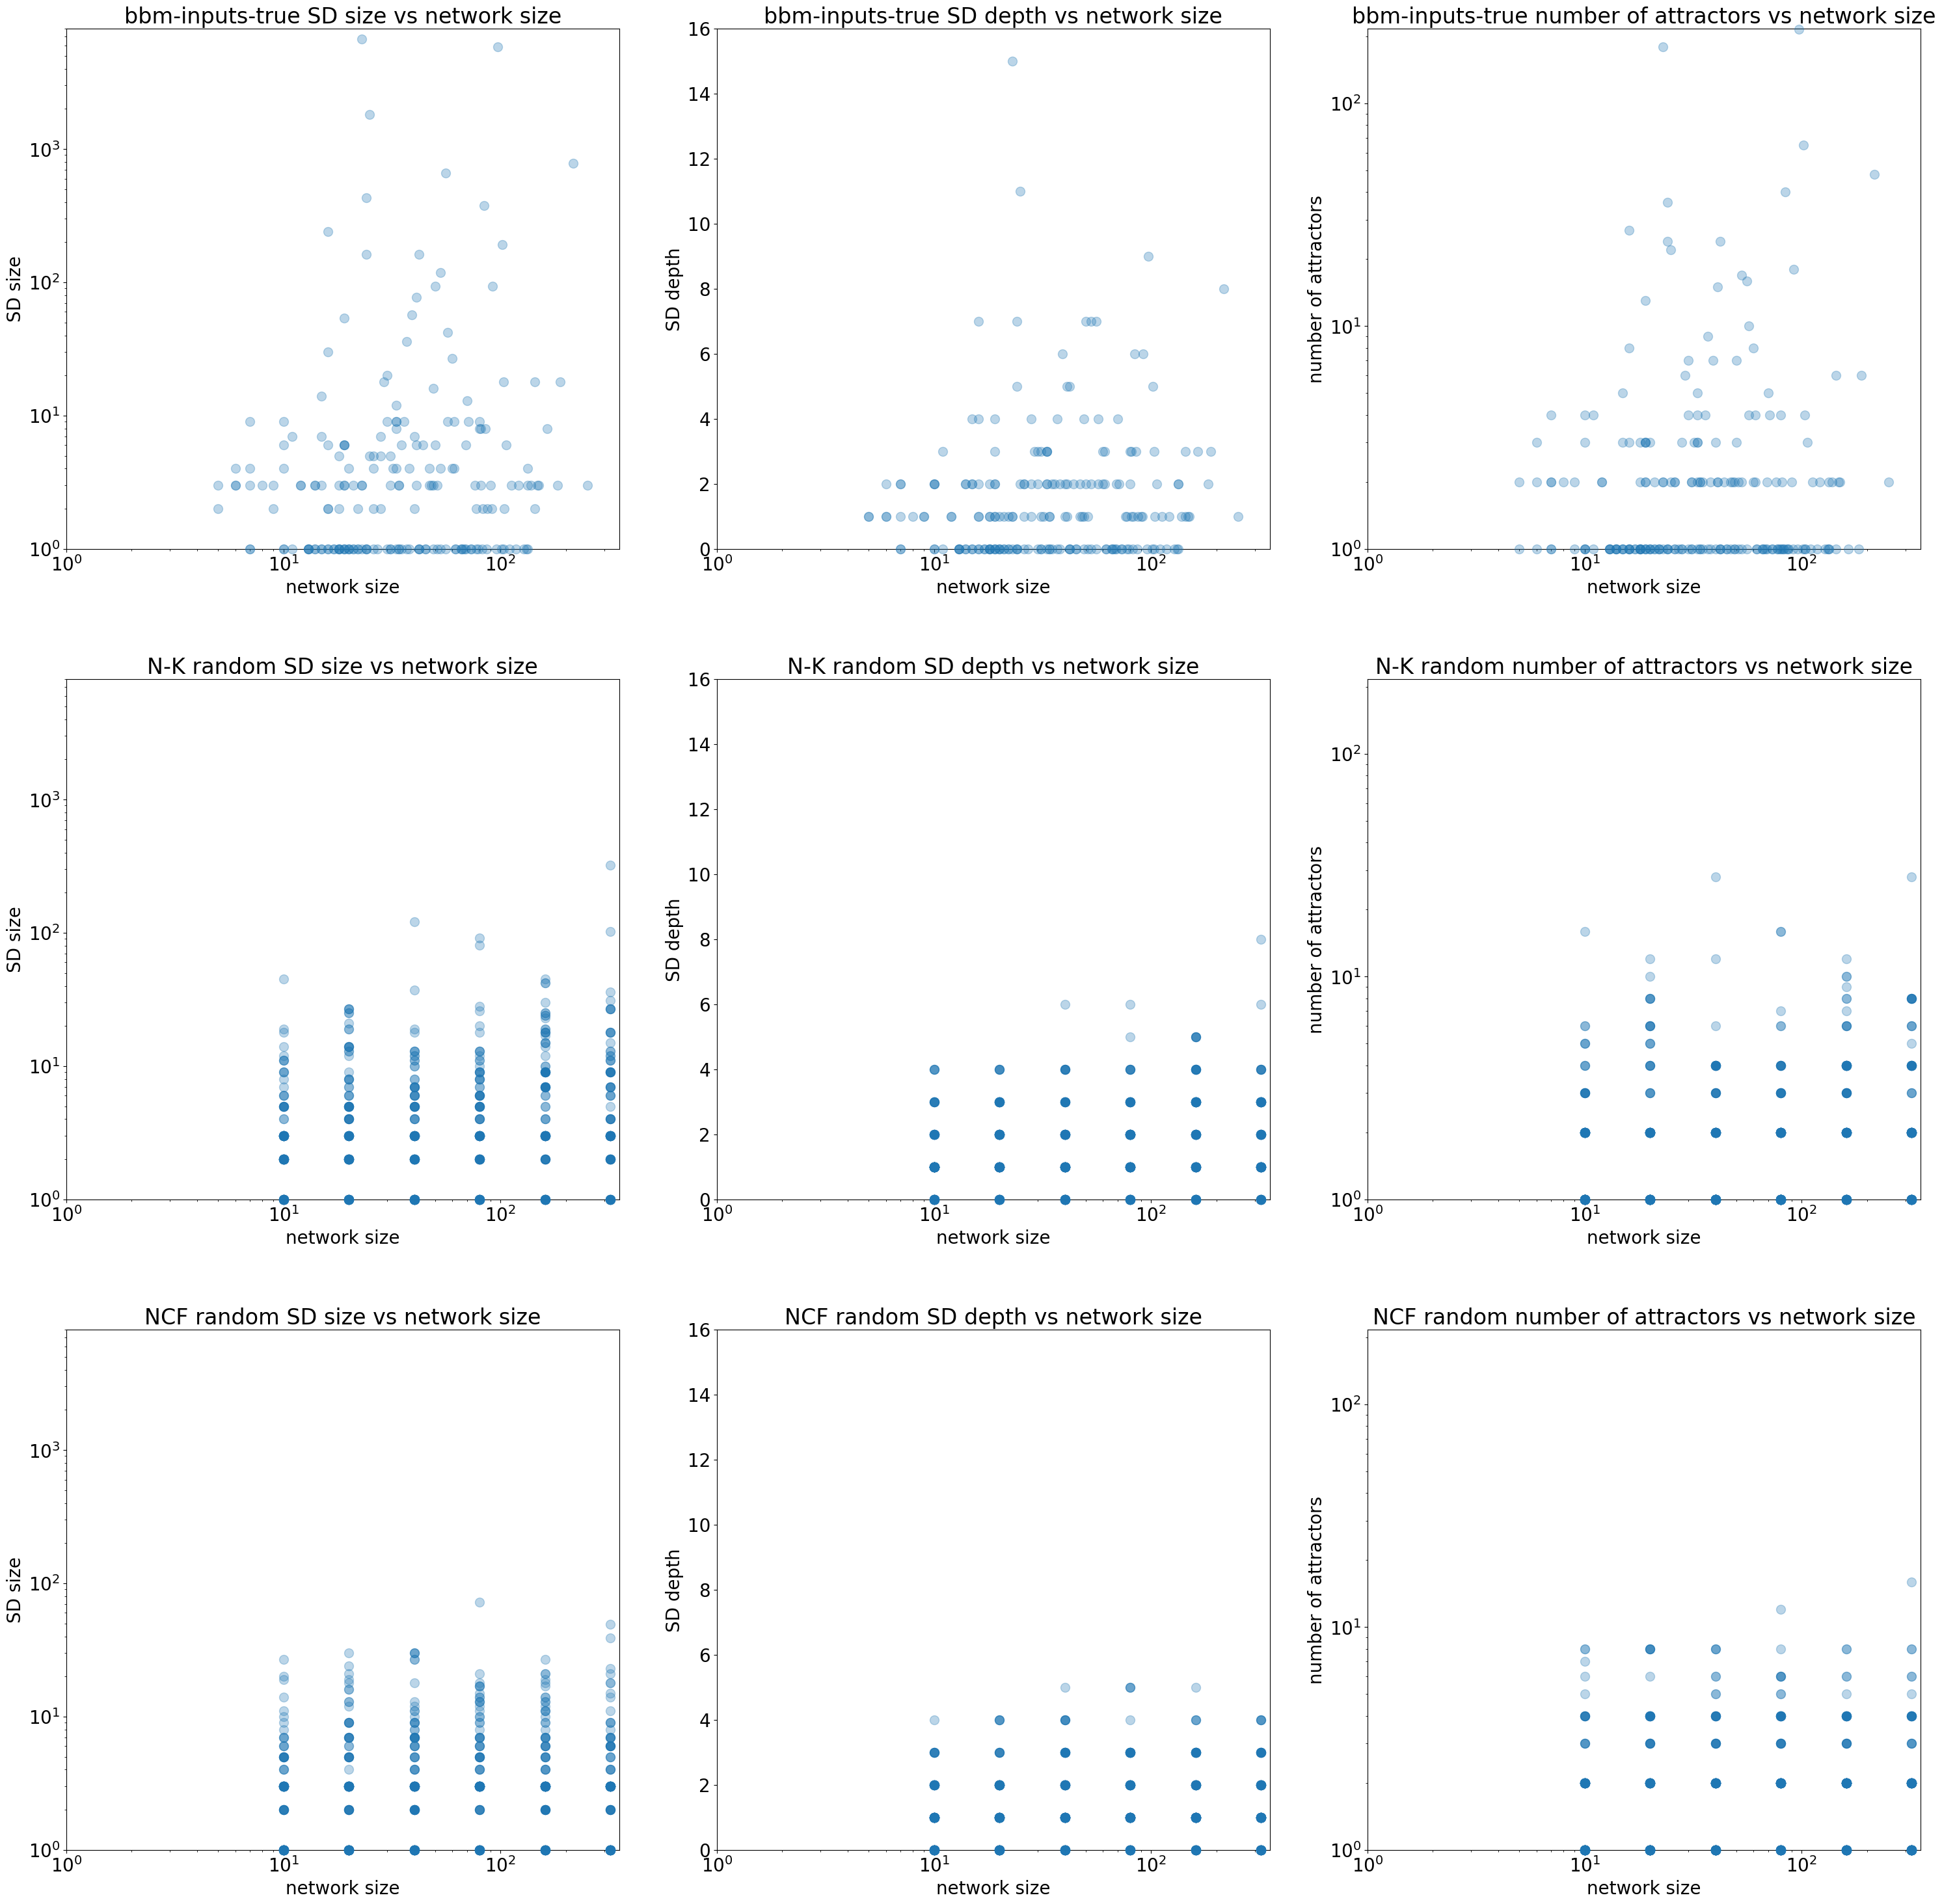

In [26]:
vars = [
    [
        (
            PlotVar(BTR,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(BTR,"sdsize",1,BTR["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(BTR,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(BTR,"sddepth",0,BTR["sddepth"].max()+1),
        ),
        (
            PlotVar(BTR,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(BTR,"att",1,BTR["att"].max()+1,log=True),
        ),
    ],
    [
        (
            PlotVar(RAN,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(RAN,"sdsize",1,BTR["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(RAN,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(RAN,"sddepth",0,BTR["sddepth"].max()+1),
        ),
        (
            PlotVar(RAN,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(RAN,"att",1,BTR["att"].max()+1,log=True),
        ),
    ],
    [
        (
            PlotVar(NCF,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(NCF,"sdsize",1,BTR["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(NCF,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(NCF,"sddepth",0,BTR["sddepth"].max()+1),
        ),
        (
            PlotVar(NCF,"n",1,BTR["n"].max()+100,log=True),
            PlotVar(NCF,"att",1,BTR["att"].max()+1,log=True),
        ),
    ],
]

fig = comparison_plots(vars)

log fit: R² = 0.9296662788977643
log fit: Y = e^(0.7920002773064526 * x)
log fit: R² = 0.8974899873879097
log fit: Y = e^(0.78681260126462 * x)
log fit: R² = 0.87610316732969
log fit: Y = e^(0.8260512799330915 * x)


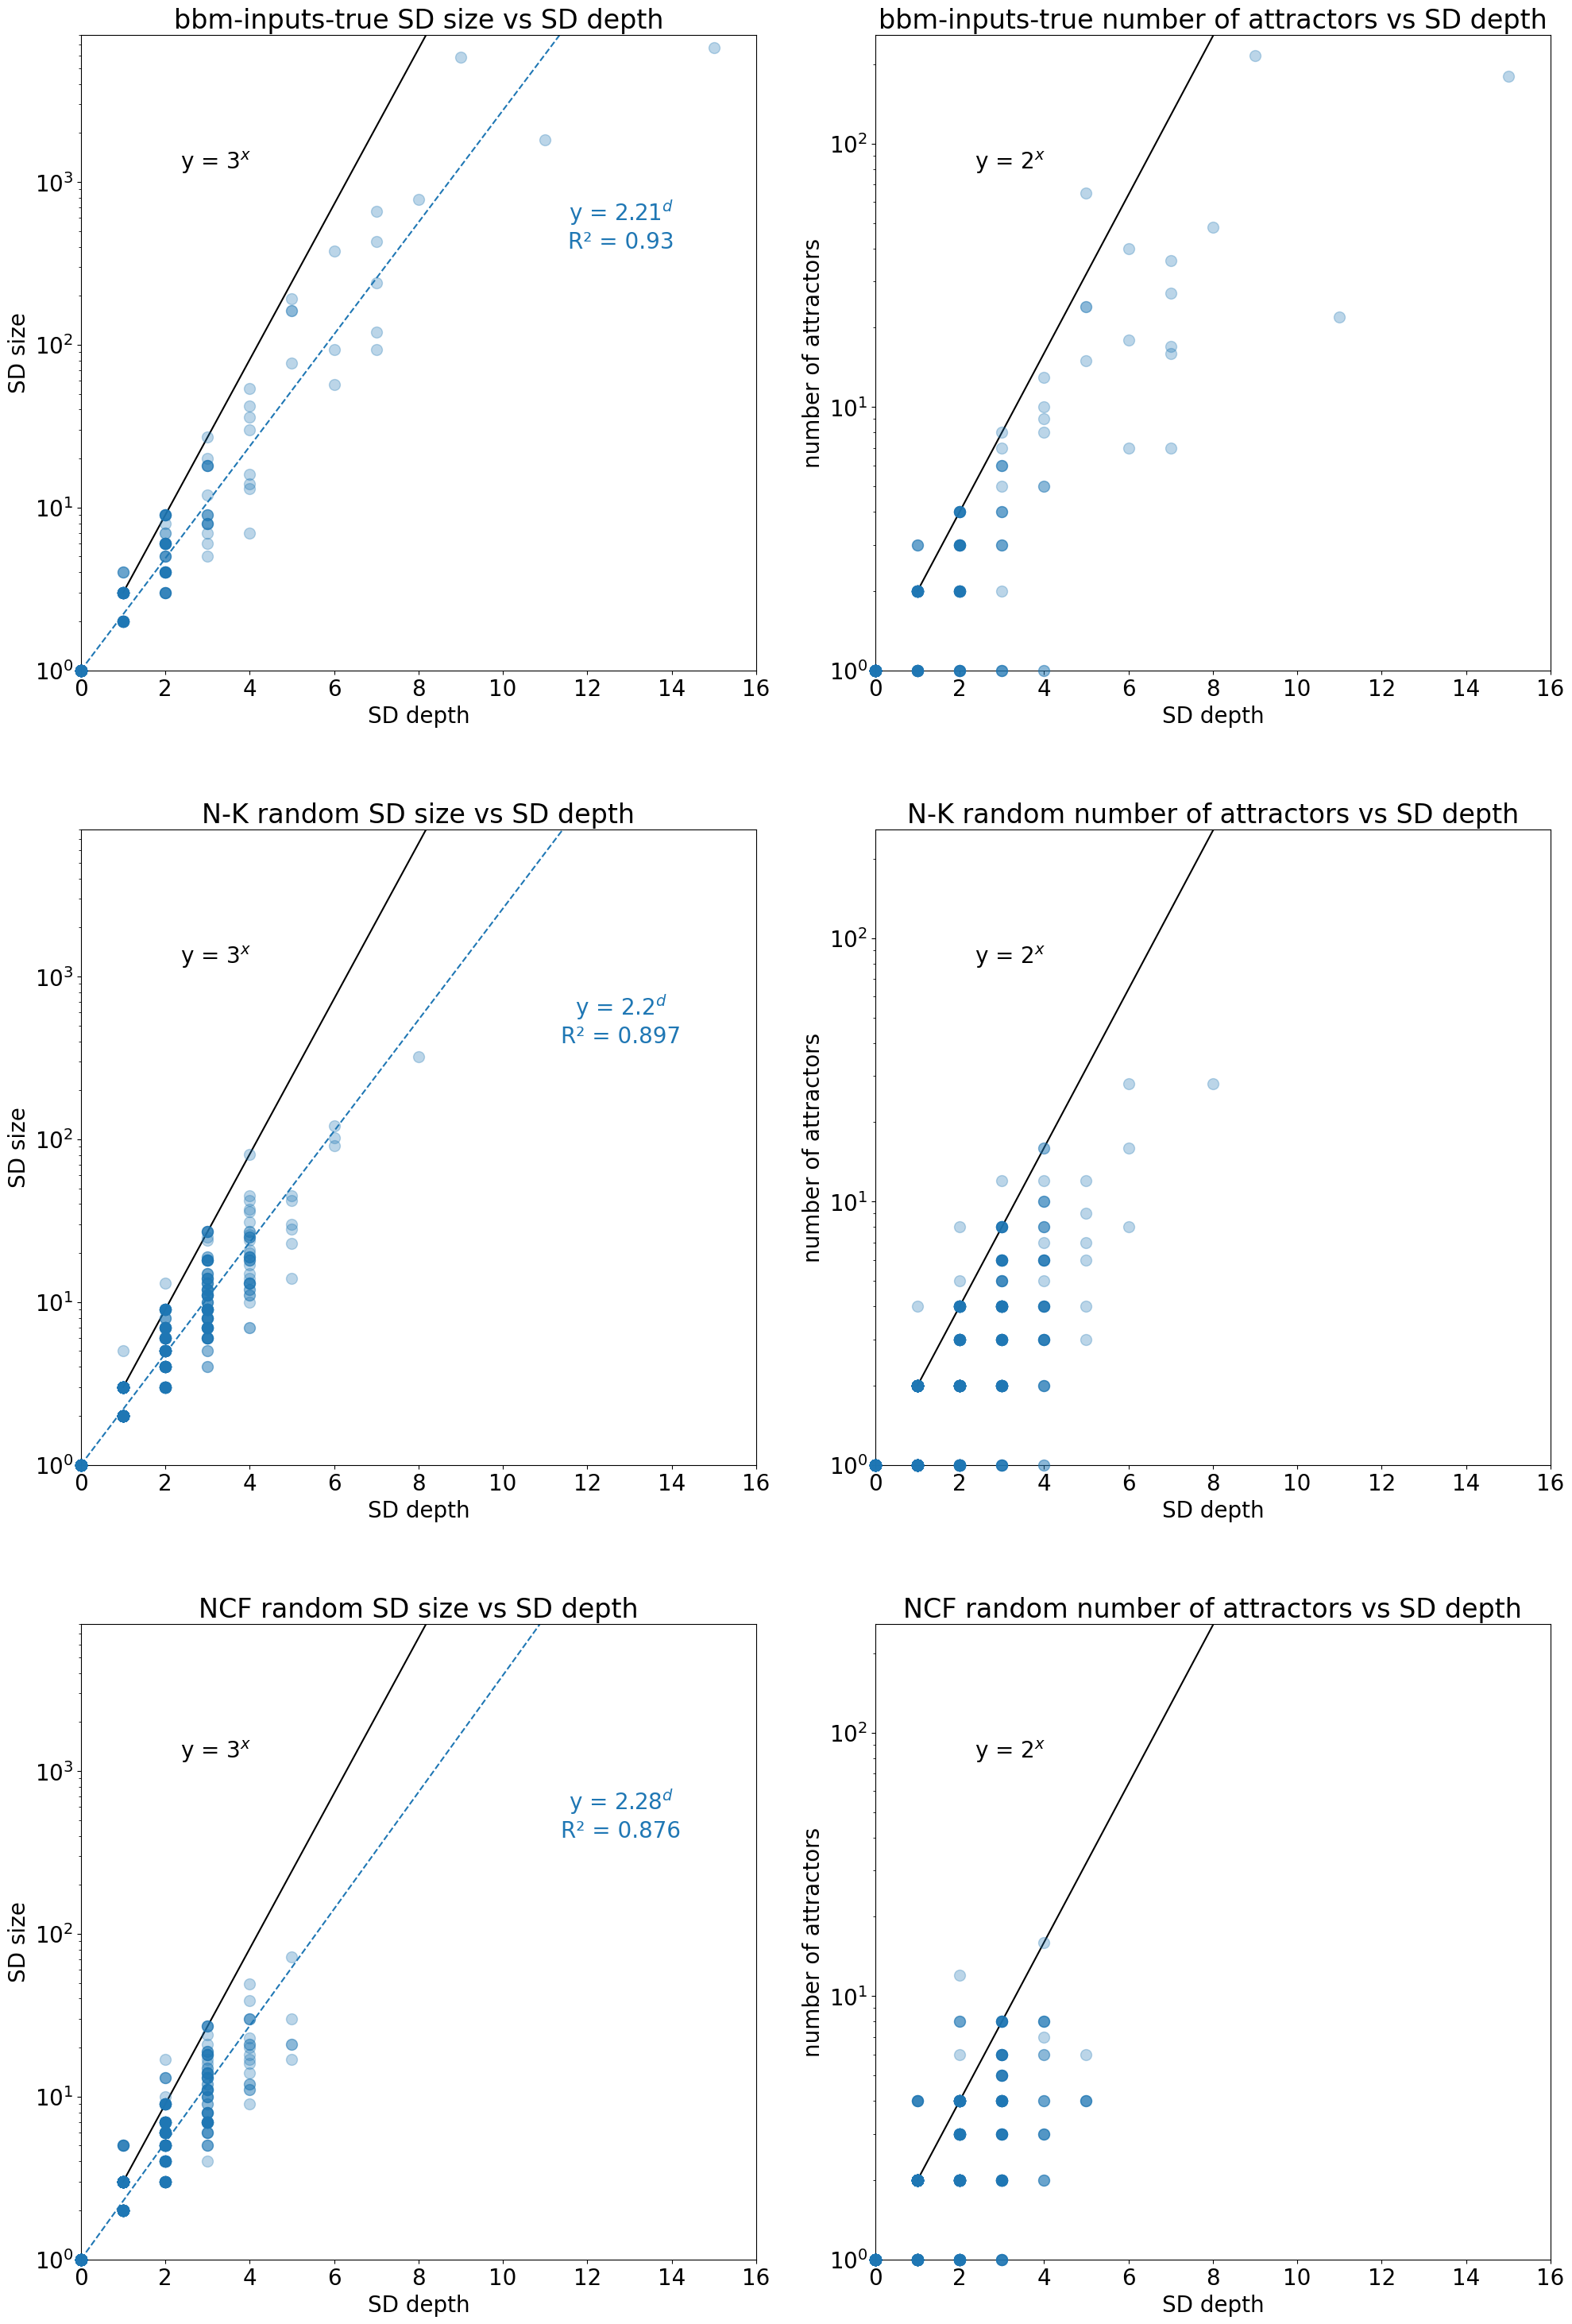

In [27]:
vars = [
    [
        (
            PlotVar(BTR,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(BTR,"sdsize",1,BTR["sdsize"].max()*1.2,True,True, ref=[IND]),
        ),
        (
            PlotVar(BTR,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(BTR,"att",1,BTR["att"].max()*1.2,True, ref=[IND]),
        ),
    ],
    [
        (
            PlotVar(RAN,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(RAN,"sdsize",1,BTR["sdsize"].max()*1.2,True, True, ref=[IND]),
        ),
        (
            PlotVar(RAN,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(RAN,"att",1,BTR["att"].max()*1.2,True, ref=[IND]),
        ),
    ],
    [
        (
            PlotVar(NCF,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(NCF,"sdsize",1,BTR["sdsize"].max()*1.2,True, True, ref=[IND]),
        ),
        (
            PlotVar(NCF,"sddepth",0,BTR["sddepth"].max()+1),
            PlotVar(NCF,"att",1,BTR["att"].max()*1.2,True, ref=[IND]),
        ),
    ],
]

fig = comparison_plots(vars)

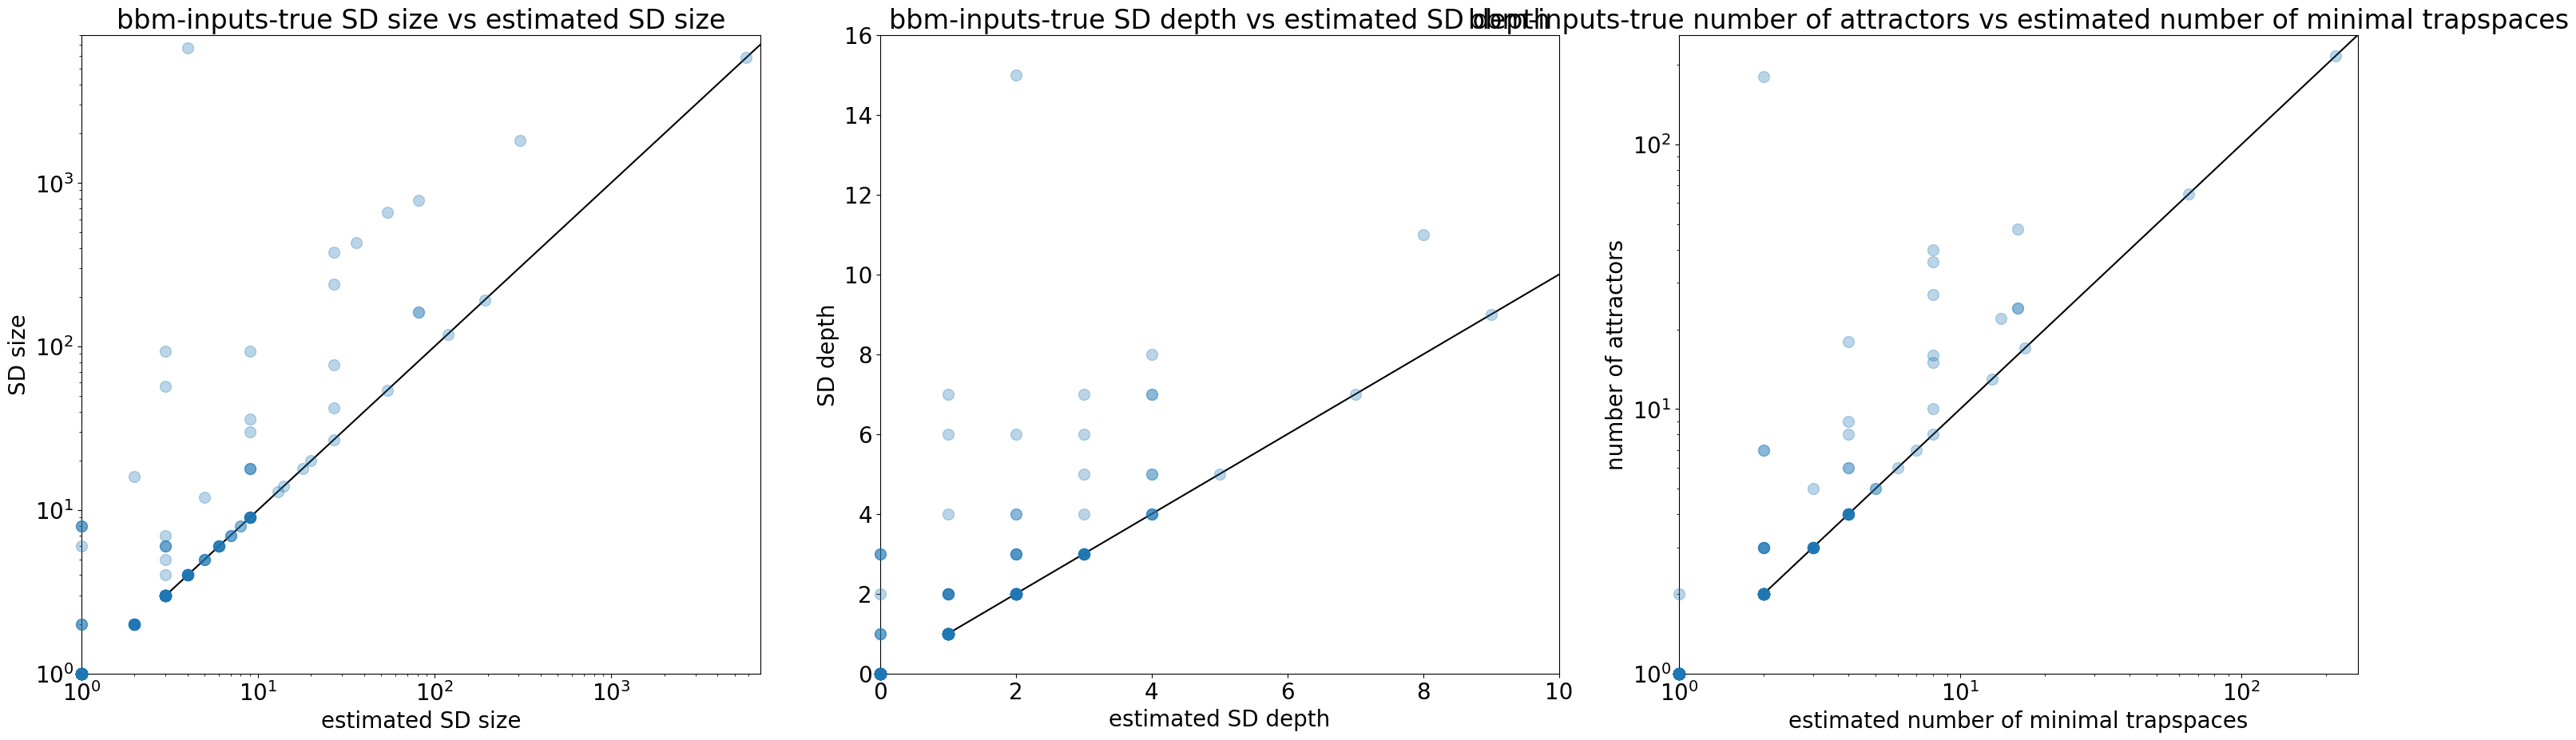

In [28]:
vars = [
    [
        (
            PlotVar(BTR,"est_size",1,BTR["est_size"].max()*1.2,log=True),
            PlotVar(BTR,"sdsize",1,BTR["sdsize"].max()*1.2,log=True, ref=[IND]),
        ),
        (
            PlotVar(BTR,"est_depth",0,BTR["est_depth"].max()+1),
            PlotVar(BTR,"sddepth",0,BTR["sddepth"].max()+1, ref=[IND]),
        ),
        (
            PlotVar(BTR,"est_min",1,BTR["est_min"].max()*1.2,log=True),
            PlotVar(BTR,"att",1,BTR["att"].max()*1.2,log=True, ref=[IND]),
        ),
    ],
]

fig = comparison_plots(vars)